# Storytelling - Python Projeto Final

Projeto final do curso Python para Análise de Dados da [EBAC](https://ebaconline.com.br/) (Escola Britânica de Artes Criativas & Tecnologia). <br/>
Este módulo faz parte do curso [Profissão: Cientista de Dados](https://ebaconline.com.br/cientista-de-dados), onde o conhecimento da linguagem de programação Python é muito importante.<br/>
Aulas ministradas pelo professor [André Perez](https://www.linkedin.com/in/andremarcosperez/).<br/><br/>

**Python para Análise de Dados - Módulos:**
1. Introdução ao curso Python para Análise de Dados<br/>
2. Variáveis & Tipos de Dados Estrutura de Dados<br/>
3. Fluxo Condicional & Repetição<br/>
4. Arquivos & Funções<br/>
5. Programação Funcional<br/>
6. Programação Orientada a Objetos<br/>
7. Módulos & Pacotes<br/>
8. Tratamento de Erros<br/>
9. Scripting<br/>
10. Projeto Final
<br/><br/>

Obs.: O notebook e a base de dados para o projeto final foi disponibilizado pela [EBAC](https://ebaconline.com.br/), entretanto para fins de estudos e aperfeiçoamento em Python, reescrevi o código abaixo com base no notebook origial.

# 1. Exploração de Dados

Os dados contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de `default`, que indica se um cliente é **adimplente(default = 0)**, ou **inadimplente (default = 1)**, ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

1.1 Descrição completa dos atributos.
---



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Definindo estilo dos gráficos.
sns.set_style("whitegrid")

#Carregando a base de dados.
df = pd.read_csv('../input/ebac-python-projeto-final-dataset/Python_M10_support material.csv', na_values='na')

1.2 Base de dados
-----------------
Base no formato .CVS carregado no Kaggle. <br/>
Lendo os dados num dataframe panda, podemos verificar visualmente suas colunas e linhas.

In [2]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


1.3 Estrutura dos Dados
-----------------------

Podemos verificar a estrutura dos dados separando a base por:<br/>
1. Todos os clientes<br/>
2. Clientes adimplentes<br/>
3. Clientes inadimplentes<br/>

Importante ressaltar, a coluna `default` possui os dados `default = 0` (adimplente) ou `default = 1` (inadimplente).

In [3]:
# Quantidade linhas e colunas
print(f"1. Todos os clientes: {df.shape} (linhas/colunas)")
print(f"2. Clientes adimplentes: {df[df['default'] == 0].shape} (linhas/colunas)")
print(f"3. Clientes inadimplentes: {df[df['default'] == 1].shape} (linhas/colunas)")
print("")

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print("Proporção de Adimplente e Inadimplente com a base completa")
print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

1. Todos os clientes: (10127, 16) (linhas/colunas)
2. Clientes adimplentes: (8500, 16) (linhas/colunas)
3. Clientes inadimplentes: (1627, 16) (linhas/colunas)

Proporção de Adimplente e Inadimplente com a base completa
A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


1.4 Schema
----------

Abaixo, podemos analisar novamente a estrutura da base de dados e relacionar os dados das colunas e seus respectivos tipos de dados. Desta forma, podemos identificar possíveis problemas facilitando a transformação e limpeza dos dados.<br/>
Essa análise nos possibilita encontrar dados faltantes, necessidade em transformar os dados e alterar o tipo de dado de determinada coluna.<br/>

Aparentemente as colunas `escolaridade` e `estado_civil` possuem dados faltantes.<br/>
Vamos revisitar esse item e identificar todas as colunas com dados faltantes. 

As colunas `limite_credito` e `valor_transacoes_12m` ambas são do tipo `object`.<br/>
Os valores estão em *R$* onde o uso de vírgula e ponto são diferentes do padrão americano utilizado pelo Python. <br/><br/>

In [4]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [5]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

1.5 Atributos categóricos
-------------------------

As colunas `escolaridade`, `estado_civil` e `salario_anual` possuem dados faltantes.<br/>
Esses dados devem ser tratados com a exclusão das linhas, porém, é importante verificar a proporção dos daados para não comprometer na etapa de visualização e análise. 

In [6]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


1.6 Atributos numéricos
-------------------------

Aparentemente as colunas com atributo numérico não possuem dados faltantes, entretanto, as `colunas limite_credito` e `valor_transacoes_12m` devem ser tratadas para análise de dados.

In [7]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


1.7 Dados Faltantes
-------------------

As categorias `escolaridade`, `estado_civil` e `salario_anual` relamente estão com dados faltantes.<br/>
Além dessa identificação, faremos o levantamento estatístico de cada coluna contemplando os dados de:<br/>
1. Todos os clientes<br/>
2. Clientes adimplentes<br/>
3. Cliente inadimplentes<br/><br/>

A proporção dos dados da base com os perfis de clientes adimplente e inadimplente são próximos. Assim sendo, podemos fazer a limpeza e tranformação dos dados.<br/>
Podemos excluir linhas com dados faltantes da base original, posteriormente teremos os dados proporcionais para análise.<br/><br/>

Identificando os dados faltantes abaixo.

In [8]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Aálise estatística

In [9]:
# Função para levantar estatísticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)
            
            for stat in stats_dados_faltantes:
                print(stat)

# Imprimindo os dados para análise estatística 
print("1. Todos os Clientes")
stats_dados_faltantes(df=df)
print("")
print("2. Clientes adimplentes")
stats_dados_faltantes(df=df[df['default'] == 0])
print("")
print("3. Clientes inadimplentes")
stats_dados_faltantes(df=df[df['default'] == 1])

1. Todos os Clientes
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}

2. Clientes adimplentes
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}

3. Clientes inadimplentes
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'escolaridade': {'quantidad

# 2. Transformação e limpeza de dados

Após entender a natureza do conjunto de dados, pode ser feito a transformação e limpeza para melhor análise.<br/>
Em especial será corrigido o **schema** das colunas `escolaridade`, `estado_civil`, `salario_anual` e **remover os dados faltantes**.

2.1 Correção de schema
---

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).<br/>
Faremos a correção para **colunas numéricas**.

In [10]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [11]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Antes de efetuar a limpeza dos dados, é importante testar a aplicação.<br/>
A função `lambda` abaixo será executada para testar e verificar os dados das colunas correspondentes.<br/><br/>
Com a função lambada testada e aprovada, podemos aplicar nas colunas de interesse.

In [12]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [13]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Descrevendo novamente o Schema.<br/>
As colunas `limite_credito` e `valor_transacoes_12m` foram alteradas para `float64`.

In [14]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Atributos categóricos.

In [15]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


Atributos numéricos.

In [16]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


2.2 Remoção de dados faltantes
---

Como o *pandas* está ciente do que é um dado faltante, a remoção das linhas problemáticas é trivial.<br/><br/>
Vamos reanalisar a estrutura dos dados original.<br/>
Na sequência, vamos fazer a remoção dos dados faltantes e reanalisar a estrutura dos dados, para termos certeza que tudo está correto com a proporção dos dados originais e após a remoção das linhas com dados faltantes.

Estrutura de dados original

In [17]:
# Quantidade linhas e colunas
print(f"1. Todos os clientes: {df.shape} (linhas/colunas)")
print(f"2. Clientes adimplentes: {df[df['default'] == 0].shape} (linhas/colunas)")
print(f"3. Clientes inadimplentes: {df[df['default'] == 1].shape} (linhas/colunas)")
print("")

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print("Proporção de Adimplente e Inadimplente com a base completa")
print(f"Clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

1. Todos os clientes: (10127, 16) (linhas/colunas)
2. Clientes adimplentes: (8500, 16) (linhas/colunas)
3. Clientes inadimplentes: (1627, 16) (linhas/colunas)

Proporção de Adimplente e Inadimplente com a base completa
Clientes adimplentes é de 83.93%
Clientes inadimplentes é de 16.07%


Estrutura de dados nova

In [18]:
# Remoção dos dados
df.dropna(inplace=True)

# Quantidade linhas e colunas
print("Quantidade de novas linhas:")
print(f"1. Todos os clientes: {df.shape} (linhas/colunas)")
print(f"2. Clientes adimplentes: {df[df['default'] == 0].shape} (linhas/colunas)")
print(f"3. Clientes inadimplentes: {df[df['default'] == 1].shape} (linhas/colunas)")
print("")

# Calculando os dados novos 
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print("Proporção de Adimplente com a nova base")
print(f"Clientes adimplentes da base origial é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print("Proporção de Inadimplente com a nova base")
print(f"Clientes inadimplentes da base origial é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"Nova proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

Quantidade de novas linhas:
1. Todos os clientes: (7081, 16) (linhas/colunas)
2. Clientes adimplentes: (5968, 16) (linhas/colunas)
3. Clientes inadimplentes: (1113, 16) (linhas/colunas)

Proporção de Adimplente com a nova base
Clientes adimplentes da base origial é de 83.93%
Nova proporção de clientes adimplentes é de 84.28%

Proporção de Inadimplente com a nova base
Clientes inadimplentes da base origial é de 16.07%
Nova proporção de clientes inadimplentes é de 15.72%


# 3. Visualização de dados

Abaixo serão mostradas diversas visualizações para correlacionar *variáveis explicativas* com a *variável resposta* para buscar entender qual fator leva um cliente a inadimplencia.<br/>
Será comparado a base com *todos os clientes* com a *base de adimplentes e inadimplentes*.

Separando os clientes *adimplentes* e *inadimplentes* com as variáveis `df_adimplente` e `df_inadimplente`.

In [19]:
df_adimplente = df[df['default'] == 0]

In [20]:
df_inadimplente = df[df['default'] == 1]

3.1 Visualizações categóricas
---

Nesta seção, vamos visualizar a relação entre a variável resposta `default` com os atributos categóricos.

In [21]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


**Escolaridade**

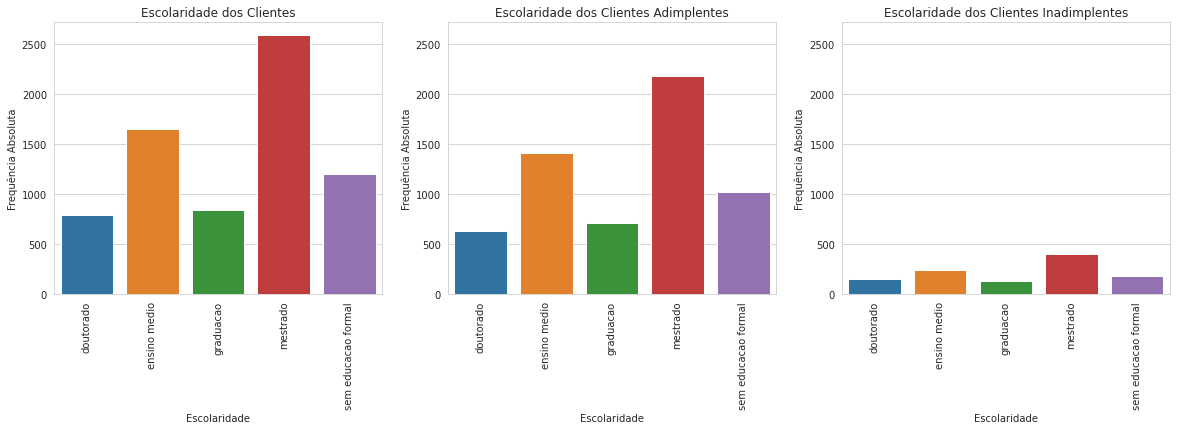

In [22]:
# escolaridade
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Tipo de Cartão**

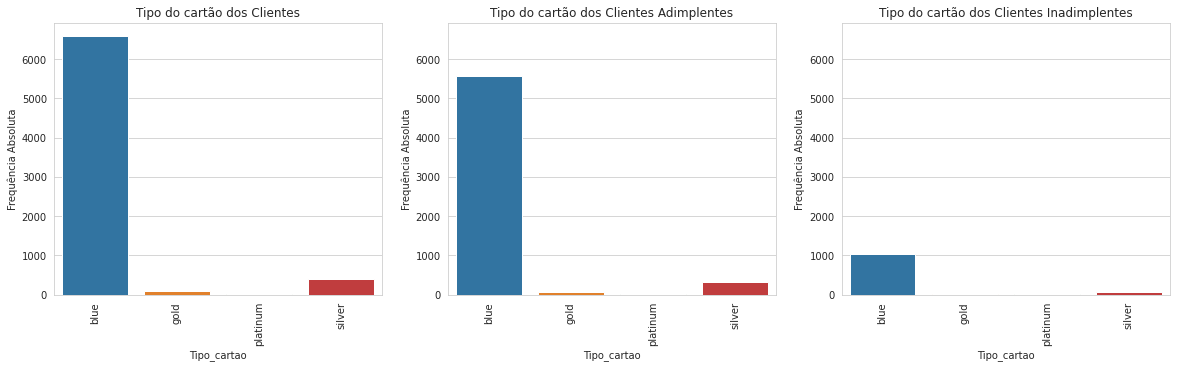

In [23]:
# tipo_cartao
coluna = 'tipo_cartao'
titulos = ['Tipo do cartão dos Clientes', 'Tipo do cartão dos Clientes Adimplentes', 'Tipo do cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

3.2 Visualizações numéricas
---

Visuzalização entre a variável resposta `default` com os atributos numéricos.

In [24]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


**Quantidade de Transações nos Últimos 12 Meses**

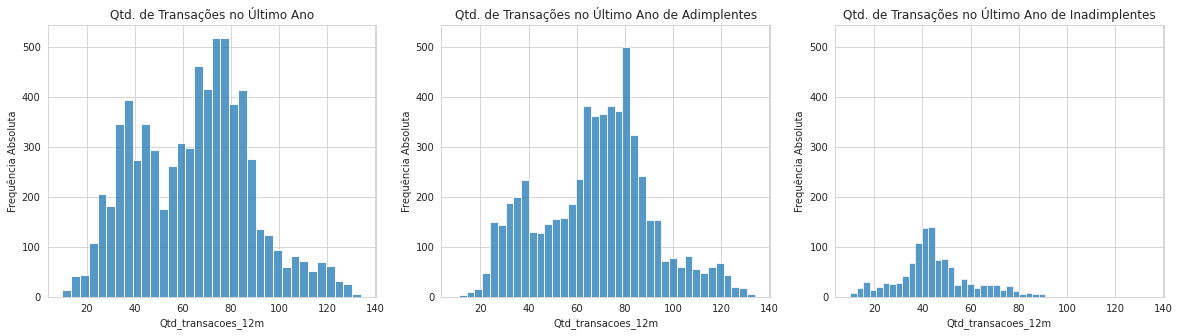

In [25]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Valor das Transações nos Últimos 12 Meses**

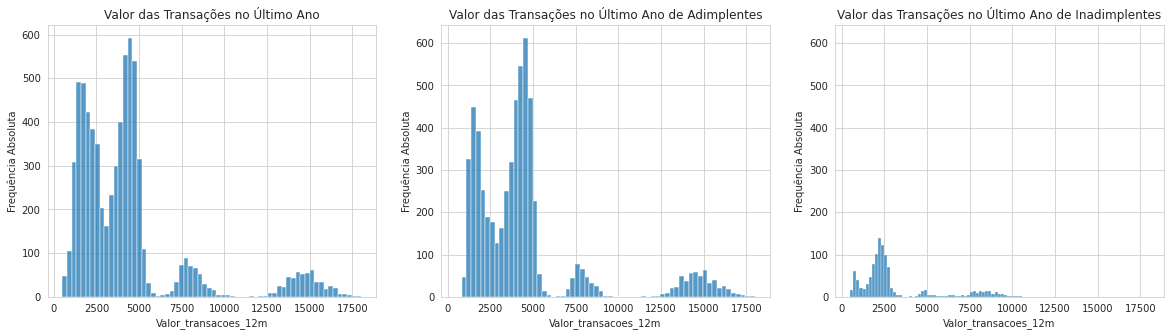

In [26]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Relação entre Valor e Quantidade de Transações no Último Ano**

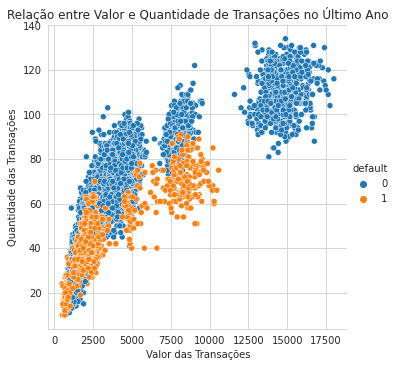

In [27]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações', 
    ylabel='Quantidade das Transações'
  )

3.3 Visualização em barras com categorias Adimplentes e Inadimplentes
---

Para visualizarmos um gráfico em barras com as categoriass Adimplentes e Inadimplentes, é necessário **alterar o shema** da coluna de `object` para `number`.<br/>
Desta forma, é possível mostrar no gráfico os valores das categorias cntemplando o mesmo período.<br/><br/>
Além de alterar o schema é necessário a substituição dos dados da coluna de "0" para "adimplente" e "1" para "inadimplente".

In [28]:
# Alterando o schema
data_types_dict = {'default': str}
df = df.astype(data_types_dict)
df.dtypes

# Substituindo os dados.
fn2 = lambda valor: str(valor.replace("1", "Inadimplente").replace("0", "Adimplente"))

# Verificando os dados
valores_originais = ['1', '0']
valores_alterados = list(map(fn2, valores_originais))
#print(valores_originais)
#print(valores_alterados)

# Aplicando a função na base
df['default'] = df['default'].apply(fn2)

# Visualização do Tipo
print(df.dtypes)
print("")

# Visualização da tabela
df.head(n=5)

id                           int64
default                     object
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object



,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,Adimplente,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,Adimplente,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,Adimplente,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,Adimplente,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,Adimplente,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


**Barras agrupadas**
1. Relação entre Adimplentes/Inadimplentes e **Valores das Transações no Último Ano**
2. Relação entre Adimplentes/Inadimplentes e **Quantidade de Transações no Último Ano**

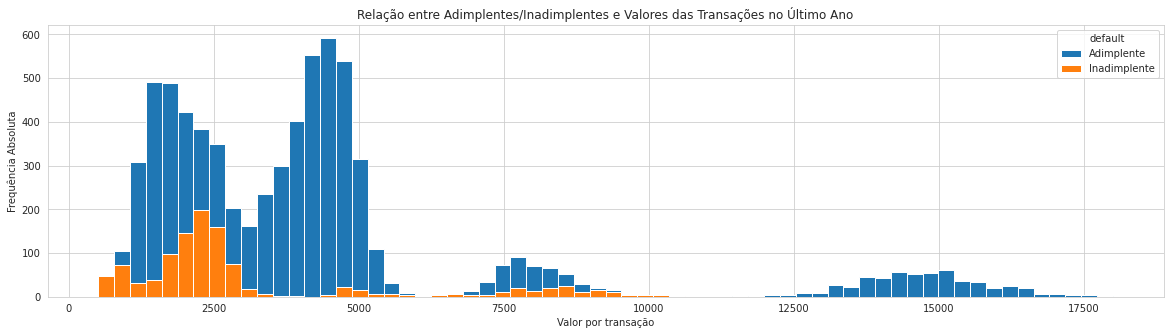

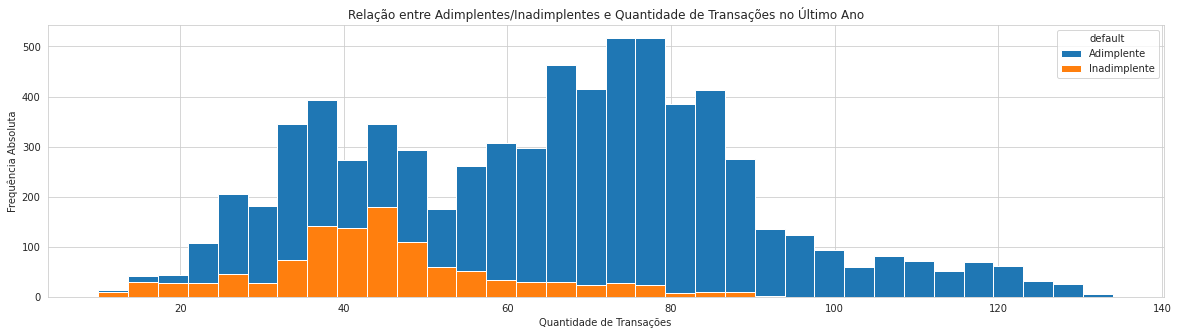

In [29]:
# Primeiro gráfico
coluna = 'valor_transacoes_12m'
titulos = ['Relação entre Adimplentes/Inadimplentes e Valores das Transações no Último Ano']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, figsize=(20, 5), sharex=True)

f = sns.histplot(data= df, x= coluna, alpha= 1, hue= 'default', multiple='stack')
f.set(title=titulos[eixo], xlabel='Valor por transação', ylabel='Frequência Absoluta')

figura.show()

# Segundo gráfico
coluna = 'qtd_transacoes_12m'
titulos = ['Relação entre Adimplentes/Inadimplentes e Quantidade de Transações no Último Ano']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, figsize=(20, 5), sharex=True)

f = sns.histplot(data= df, x= coluna, alpha= 1, hue= 'default', multiple='stack')
f.set(title=titulos[eixo], xlabel='Quantidade de Transações', ylabel='Frequência Absoluta')

figura.show()

# 4. Insights

**Visualização de Atributos categóricos**<br/>
1. De acordo com o resultado dos gráficos, não é possível identificar uma discrepância nos dados relacionando com a causa da inadimplência.
2. Pela análise visual, é possível notar o mesmo padrão da *base completa* com os *clientes adimplentes* e *inadimplentes* e isso ocorre para todas as demais categorias: `salario_anual`, `estado_civil`, `salario_anual` e `tipo_cartao`.

**Visualização de Atributos numéricos**
1. No gráfico **“Quantidade de Transações nos Últimos 12 Meses” dos Clientes adimplentes** podemos notar uma leve variação na região entre *30 a 50* transações comparado com a base de todos os clientes.
2. Analisando o mesmo gráfico **“Quantidade de Transações nos Últimos 12 Meses” nos valores dos Clientes** inadimplentes é visível uma variação na mesma faixa de 30 a 50 transações.
3. Ambos os gráficos não seguem o padrão da quantidade total de clientes.
4. De acordo com esses dados, o maior volume dos Clientes inadimplentes está na faixa entre *30 a 50* transações.
5. No gráfico **“Valor das Transações nos Últimos 12 Meses” dos Clientes inadimplentes** é visível a diferença com relação a base de todos os clientes.
6. Nos valores entre 1000 a 3000, 5000 e 7500 a 10000 é a maior variação de clientes inadimplentes. Nos valores mais autos, não ocorrem inadimplência.

**Visualização de Barras agrupadas**<br/>
Para facilitar as visualizações acima, montei dois gráficos com as barras agrupadas, onde fica fácil a visualização de onde ocorrem os casos de inadimplência.
1. Valores entre 1000 a 3000, 5000 e 7500 a 10000.
2. Número de transações de 10 a 90.
